<div style="background-color:#FDFEFE; padding:20px; border-radius:12px; text-align:center; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
    <h1 style="color:#1B2631; margin:0; font-size:32px;"><b>🌐📱 Social Media Ad-Analysis</b></h1>
    <p style="color:#566573; font-size:16px; margin-top:8px;"><b>
</div>

---

### **📂 Dataset**
The dataset used for this notebook contains detailed information about ad campaigns on various social media platforms.

---

### **🎯 Intent**
The intent behind this notebook is to analyze advertisements across different platforms, identify **patterns & trends**, and derive **actionable insights** to improve marketing strategies.

---

### **📝 Objective**
- To analyze **ad campaign performance** across social media platforms  
- To identify **trends and factors** influencing engagement and conversions  
- To derive **data-driven insights** for better targeting and ROI optimization  
- To provide **actionable recommendations** for campaign improvement

---

### **📌 Notebook Structure**
1. **Importing Libraries**  
2. **Exploring & Investigating the Dataset**  
3. **Data Analysis & Visualization**  
   - Univariate Analysis  
   - Bivariate Analysis  
   - Multivariate Analysis  
4. **Insights**

---

### **👨‍💻 Author**
**Pranshul Joshi**  
*Data Analyst


---



<div style="background-color:#AED6F1; padding:12px; border-radius:8px;">
    <h3 style="color:#1B2631; margin:0;"> <b>Importing Libraries</b> </h3>
</div>

In [1]:
#IMPORTING LIBRARIES AND DATASET

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv('/kaggle/input/social-media-advertisement-performance/ads.csv')
data.head(10)

#Seaborn warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<div style="background-color:#AED6F1; padding:12px; border-radius:8px;">
    <h3 style="color:#1B2631; margin:0;"> <b>Exploring & Investigating Data</b> </h3>
</div>

In [2]:
#CHECKING DATA TYPES

data.dtypes

ad_id                int64
campaign_id          int64
ad_platform         object
ad_type             object
target_gender       object
target_age_group    object
target_interests    object
dtype: object

In [3]:
#GETTING OVERVIEW Of DATA SHAPE AND COMPOSITION

data.shape

(200, 7)

In [4]:
#DISCRIPTIVE STATISTICS FOR NUMERICAL VARIABLES

data.describe()

,ad_id,campaign_id
count,200.000000,200.000000
mean,100.500000,25.125000
std,57.879185,13.713485
min,1.000000,1.000000
25%,50.750000,13.000000
50%,100.500000,25.000000
75%,150.250000,37.000000
max,200.000000,50.000000


In [5]:
#DISPLAY INFO ABOUT EACH COLUMN

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ad_id             200 non-null    int64 
 1   campaign_id       200 non-null    int64 
 2   ad_platform       200 non-null    object
 3   ad_type           200 non-null    object
 4   target_gender     200 non-null    object
 5   target_age_group  200 non-null    object
 6   target_interests  200 non-null    object
dtypes: int64(2), object(5)
memory usage: 11.1+ KB


In [6]:
#CHECKING FOR DUPLICATES

data.duplicated().sum()

0

In [7]:
#CHECKING FOR NULL VALUES

data.isna().sum()

ad_id               0
campaign_id         0
ad_platform         0
ad_type             0
target_gender       0
target_age_group    0
target_interests    0
dtype: int64


<div style="background-color:#AED6F1; padding:12px; border-radius:8px;">
    <h3 style="color:#1B2631; margin:0;"> <b>Analyzing & Visualizing Data</b> </h3>
</div>


<div style="background-color:#FFF9C4; padding:12px; border-radius:8px;">
    <h4 style="color:#5D4037; margin:0;"> <b>Univariate Exploration</b> </h4>
</div>

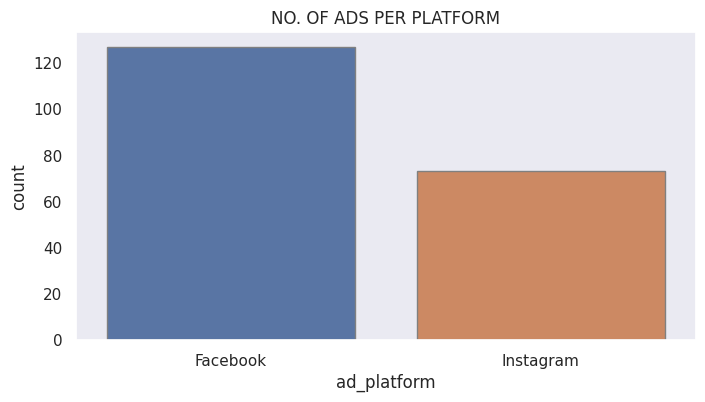

In [8]:
#SHOWS THE DISTRIBUTION OF ADS PER PLATFORM

plt.figure(figsize=(8,4))
sns.set(style=('dark'))
sns.countplot(data=data ,x='ad_platform',edgecolor='grey')
plt.title('NO. OF ADS PER PLATFORM')
plt.show()

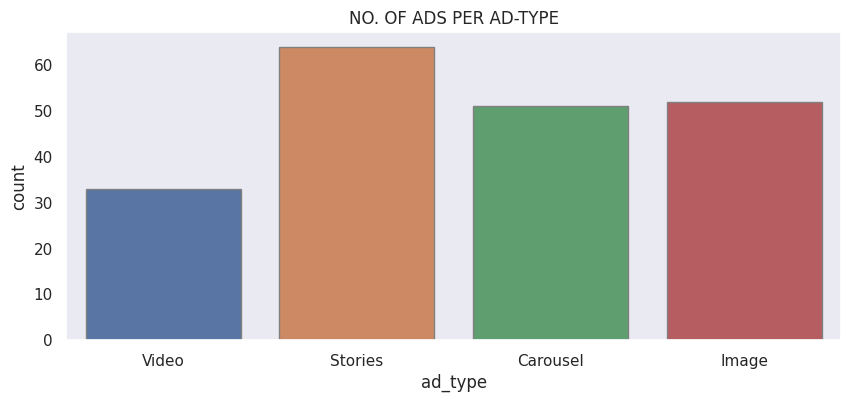

In [9]:
#SHOWS DISTRIBUTION OF ADS PER AD-TYPE

plt.figure(figsize=(10,4))
sns.countplot(data=data,x='ad_type',edgecolor='grey')
plt.title('NO. OF ADS PER AD-TYPE')
plt.show()

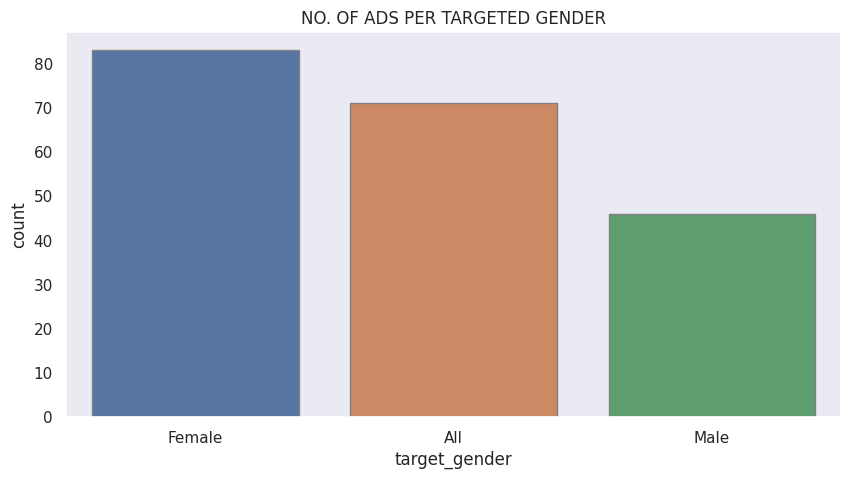

In [10]:
#SHOWS DISTRIBUTION OF ADS PER TARGETED GENDER

plt.figure(figsize=(10,5))
sns.countplot(data=data,x='target_gender',edgecolor='grey')
plt.title('NO. OF ADS PER TARGETED GENDER')
plt.show()

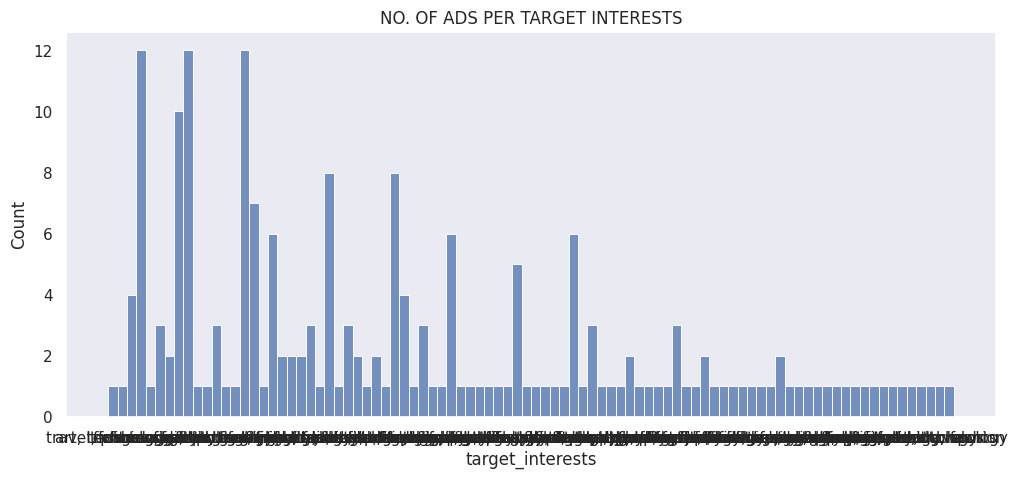

In [11]:
#SHOWS DISTRIBUTION OF ADS PER TARGET INTRESTS

plt.figure(figsize=(12,5))
sns.histplot(data=data , x='target_interests')
plt.title('NO. OF ADS PER TARGET INTERESTS')
plt.show()


<div style="background-color:#FFF9C4; padding:12px; border-radius:8px;">
    <h4 style="color:#5D4037; margin:0;"> <b>Bivariate Exploration</b> </h4>
</div>

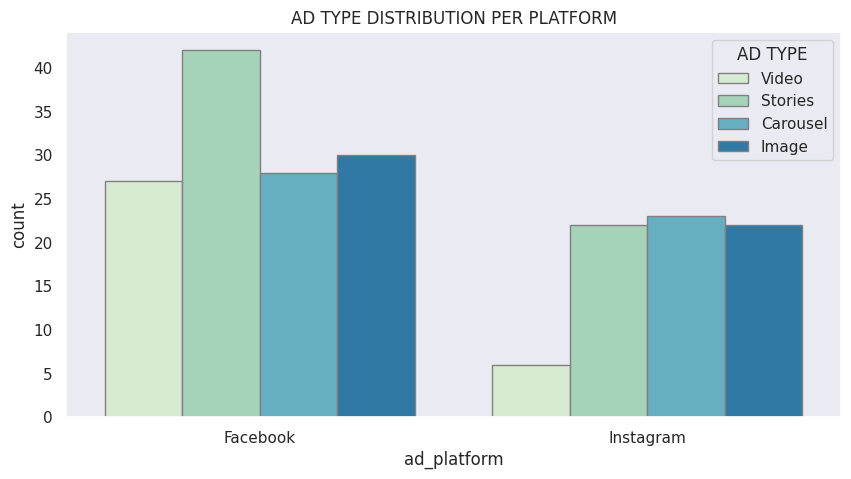

In [12]:
#DISTRIBUTION OF AD TYPE ACROSS PLATFORMS

plt.figure(figsize=(10,5))
sns.countplot(data=data , x='ad_platform',hue='ad_type',palette='GnBu',edgecolor='grey')
plt.title('AD TYPE DISTRIBUTION PER PLATFORM')
plt.legend(title='AD TYPE')
plt.show()

In [13]:
#CONVERT TARGET AGE GROUP INTO NUMERIC VALUE

age_map = { '18-24': 21, '25-34': 29.5, '35-44': 39.5} 
data['target_age_numeric'] = data['target_age_group'].map(age_map) 

#GROUP BY AD TYPE AND FIND AVG AGE

grouped = data.groupby('ad_type')['target_age_numeric'].mean()
print(grouped)

ad_type
Carousel    30.440476
Image       29.025000
Stories     30.867347
Video       29.217391
Name: target_age_numeric, dtype: float64


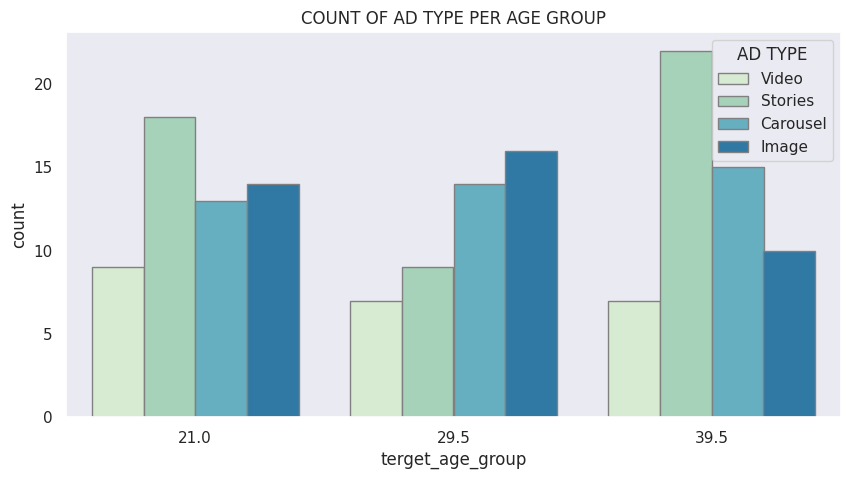

In [14]:
#DISTRIBUTION OF AD TYPE PER AGE GROUP

plt.figure(figsize=(10,5))
sns.countplot(data=data , x='target_age_numeric',hue='ad_type',palette='GnBu',edgecolor='grey')
plt.xlabel('terget_age_group')
plt.title('COUNT OF AD TYPE PER AGE GROUP')
plt.legend(title='AD TYPE')
plt.show()

# 18-24 : 21
# 25-34 : 29.5
# 35-44 : 39.5

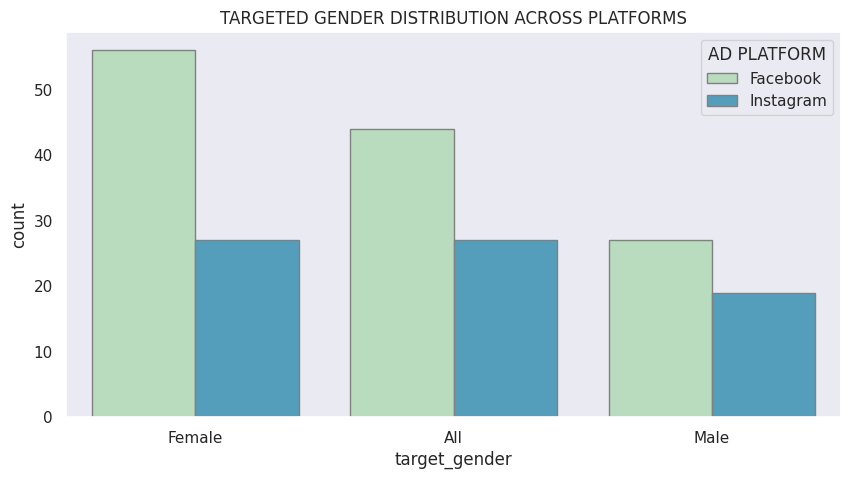

In [15]:
#DISTRIBUTION OF ADD PLATFORM PER GENDER

plt.figure(figsize=(10,5))
sns.countplot(data=data,x='target_gender',hue='ad_platform',palette='GnBu',edgecolor='grey')
plt.title('TARGETED GENDER DISTRIBUTION ACROSS PLATFORMS')
plt.legend(title='AD PLATFORM')
plt.show()

<div style="background-color:#FFF9C4; padding:12px; border-radius:8px;">
    <h4 style="color:#5D4037; margin:0;"> <b>Multivariate Exploration</b> </h4>
</div>

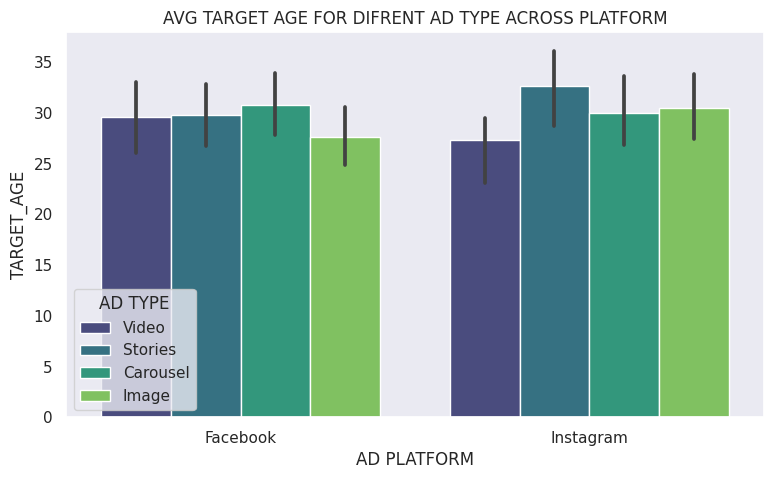

In [16]:
#SHOWS AVG TARGET AGE FOR DIFFENT AD TYPES ACROSS PLATFORM

cleaned_data = data.dropna(subset=['target_age_numeric'])
plt.figure(figsize=(9,5))
sns.barplot(data = data, x='ad_platform',y='target_age_numeric',hue='ad_type',edgecolor='white',palette='viridis')
plt.title('AVG TARGET AGE FOR DIFRENT AD TYPE ACROSS PLATFORM')
plt.legend(title='AD TYPE')
plt.xlabel('AD PLATFORM')
plt.ylabel('TARGET_AGE')
plt.show()

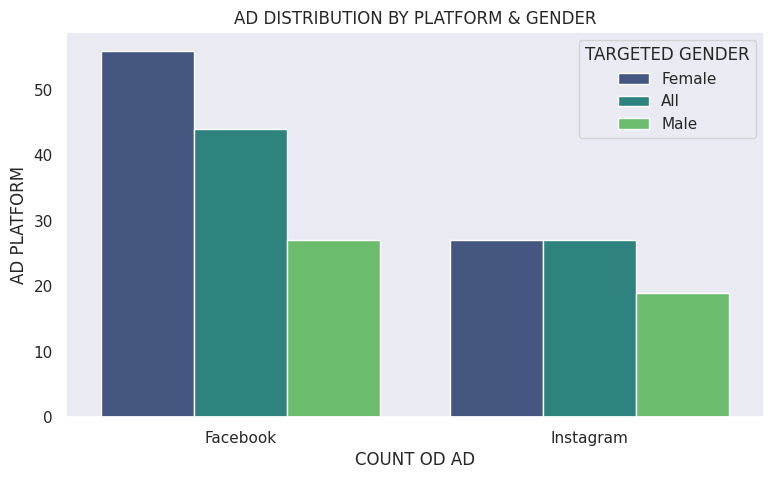

In [17]:
#SHOWS COUNT OF AD FOR DIFFRENT GENDERS ACROSS PLATFORMS

plt.figure(figsize=(9,5))
sns.countplot(data=data , x='ad_platform',hue='target_gender',palette='viridis',edgecolor='white')
plt.title('AD DISTRIBUTION BY PLATFORM & GENDER')
plt.legend(title='TARGETED GENDER')
plt.ylabel('AD PLATFORM')
plt.xlabel('COUNT OD AD')
plt.show()

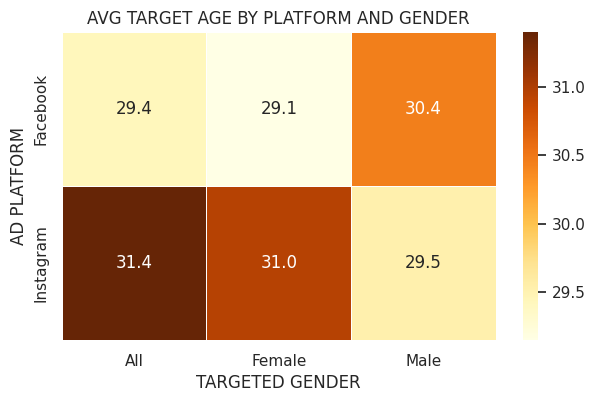

In [18]:
#SHOWS THE AVG TARGETED AGE BY AD PLATFORM AND GENDER

grouped = data.groupby(['ad_platform','target_gender'])['target_age_numeric'].mean().unstack()

plt.figure(figsize=(7,4))
sns.heatmap(grouped, annot=True, fmt=".1f", cmap='YlOrBr',linewidths=0.5,linecolor='white')
plt.title('AVG TARGET AGE BY PLATFORM AND GENDER')
plt.xlabel('TARGETED GENDER')
plt.ylabel('AD PLATFORM')
plt.show()

### 📌**INSIGHTS**


### **Univariate Analysis**
* Facebook(120) hosts almost twice as many ads compared to Instagram(60).
* Stories are the most popular ad format among the four types.
* Ads target females(80) are nearly twice as much as compare to males(40-45).

### **Bivariate Analysis**
* Facebooks is the more popular patform and stories is the moet popular Ad type .
* Stories and Carousel are the 2 most popular ad type regardless of the age category
* Facebook is more popular platform for showing ads regardless of the targeted gender.

### **Multivariate Analysis**
* On instagram videos target the hightest avg age group(25-30) while stories target slightly older age group(30+) on the ather hand on facebook image thargets the hightest age group (25-30) and carousel tagrgets slightly older age group(30+).
* In Facebook ads distribution is slighttly higher for Female (nearly 25%) while on Instagram its even.
* Instagram targets slightly older audience with avg ageof 31 while Facebook tagets slightly young audience with avg age of 29.